In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = pd.read_csv('/Users/bharath/AI/EDA/csv-files/brain_stroke.csv')

In [3]:
df = pd.DataFrame(file)
data = df

In [4]:
df.head() 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [5]:
df.shape 

(4981, 11)

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [7]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


The data points which are far away from the rest of the datapoints(mean), generally 3 standard deviations away from the mean are considered as the outliers.

### Handling outliers of the continuous feature age

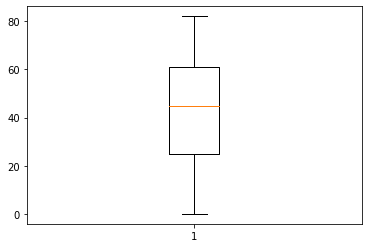

In [8]:
plt.boxplot(df['age'])
plt.show()

### Handling outliers of the continuous feature average glucose level

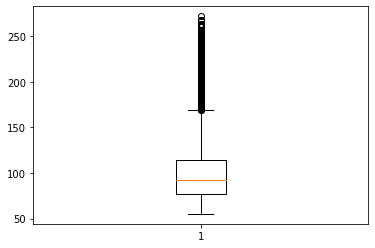

In [9]:
plt.boxplot(df['avg_glucose_level'])
plt.show()

In [13]:
df = df.reset_index(drop=True)

q1 = np.percentile(df['avg_glucose_level'], 25)
q3 = np.percentile(df['avg_glucose_level'], 75)


IQR = q3-q1

lower_bound = q1 - IQR
print(lower_bound)
upper_bound = q3 + IQR
print(upper_bound)

for i in range(len(df['avg_glucose_level'])):
    if df['avg_glucose_level'][i] < lower_bound or df['avg_glucose_level'][i] > upper_bound:
        df = df.drop(i, axis=0)



40.845
149.31


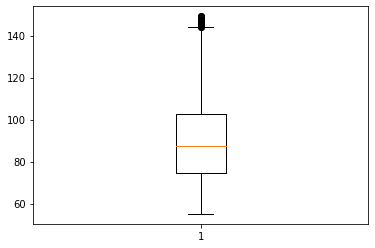

In [14]:
plt.boxplot(df['avg_glucose_level'])
plt.show()

In [16]:
df = df.reset_index(drop=True)

q1 = np.percentile(df['avg_glucose_level'], 25)
q3 = np.percentile(df['avg_glucose_level'], 75)


IQR = q3-q1

lower_bound = q1 - IQR
print(lower_bound)
upper_bound = q3 + IQR
print(upper_bound)

for i in range(len(df['avg_glucose_level'])):
    if df['avg_glucose_level'][i] < lower_bound or df['avg_glucose_level'][i] > upper_bound:
        df = df.drop(i, axis=0)



47.91499999999999
126.50750000000001


(3881, 11)


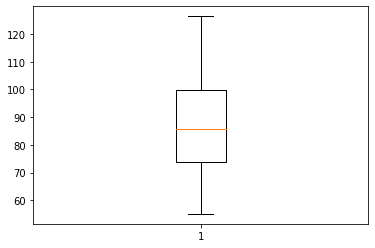

In [17]:
df = df.reset_index(drop=True)

print(df.shape)
plt.boxplot(df['avg_glucose_level'])
plt.show()

### Handling outliers of the continuous feature body mass index

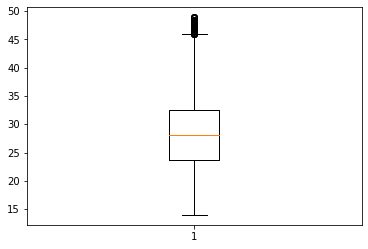

In [10]:
plt.boxplot(df['bmi'])
plt.show()

In [11]:
q1 = np.percentile(df['bmi'], 25)
q3 = np.percentile(df['bmi'], 75)


IQR = q3-q1

lower_bound = q1 - IQR
print(lower_bound)
upper_bound = q3 + IQR
print(upper_bound)

for i in range(len(df['bmi'])):
    if df['bmi'][i] < lower_bound or df['bmi'][i] > upper_bound:
        df = df.drop(i, axis=0)
        
        

14.799999999999997
41.5


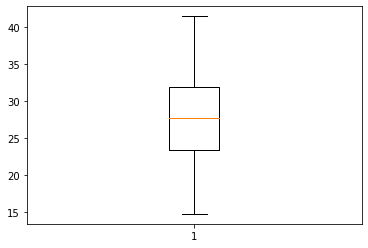

In [12]:
plt.boxplot(df['bmi'])
plt.show()